In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from decomposition import CustomPCA
# train/test split
from sklearn.model_selection import train_test_split

# dataset
from sklearn.datasets import fetch_openml

# metrics
from sklearn.metrics import f1_score

In [2]:
mnist = fetch_openml("mnist_784")

/Users/jay/opt/anaconda3/envs/USML/lib/python3.8/site-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
# dimensionality reduction
pca_5d = CustomPCA(n_components=5)
mnist_X = pca_5d.fit_transform(mnist.data.to_numpy()/255.0)
mnist_y = mnist.target
# train/test split
mnist_X_train, mnist_X_test, mnist_y_train, mnist_y_test = train_test_split(mnist_X, mnist_y, stratify=mnist_y, test_size=0.2)

/Users/jay/opt/anaconda3/envs/USML/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.6598758717047215


<Axes: ylabel='Feature'>

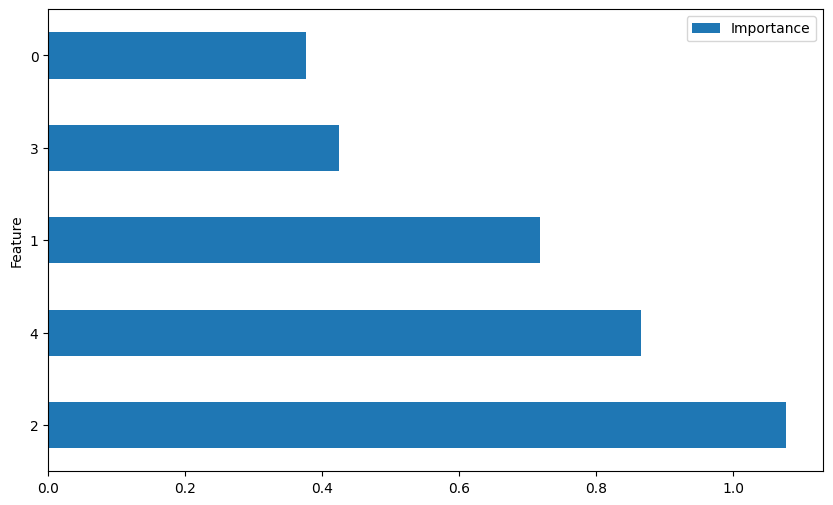

In [5]:
log_reg = LogisticRegression()
log_reg.fit(mnist_X_train, mnist_y_train)

y_pred = log_reg.predict(mnist_X_test)
print(f1_score(mnist_y_test, y_pred, average='weighted'))

avg_importance = np.mean(np.abs(log_reg.coef_), axis=0)
feature_importance = pd.DataFrame({'Feature': np.arange(log_reg.coef_.shape[1]), 'Importance': avg_importance})
feature_importance = feature_importance.sort_values('Importance', ascending=False)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))

In [6]:
# dimensionality reduction
pca_20d = CustomPCA(n_components=20)
mnist_X = pca_20d.fit_transform(mnist.data.to_numpy()/255.0)
mnist_y = mnist.target
# train/test split
mnist_X_train, mnist_X_test, mnist_y_train, mnist_y_test = train_test_split(mnist_X, mnist_y, stratify=mnist_y, test_size=0.2)

/Users/jay/opt/anaconda3/envs/USML/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8724392356430409


<Axes: ylabel='Feature'>

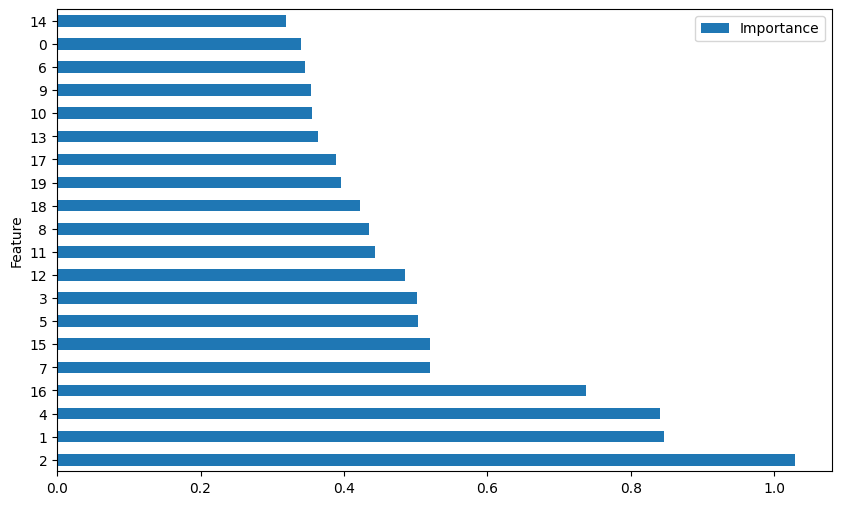

In [7]:
log_reg = LogisticRegression()
log_reg.fit(mnist_X_train, mnist_y_train)

y_pred = log_reg.predict(mnist_X_test)
print(f1_score(mnist_y_test, y_pred, average='weighted'))

avg_importance = np.mean(np.abs(log_reg.coef_), axis=0)
feature_importance = pd.DataFrame({'Feature': np.arange(log_reg.coef_.shape[1]), 'Importance': avg_importance})
feature_importance = feature_importance.sort_values('Importance', ascending=False)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))